In [1]:
import joblib
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    auc,
    confusion_matrix,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
)
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

from keystrokes.features.example_creation import ExampleCreator
from keystrokes.features.example_generation import ExampleGenerator
from keystrokes.pipelines.feature_pipeline import FeaturePipeline


from sklearn.utils import shuffle

In [3]:
ec = ExampleCreator(sampling_start_index=10000, sampling_end_index=20000)
eg = ExampleGenerator(creator=ec, num_users=600, first_user_id=10000)
X_train, y_train = eg.generate()

In [4]:
ec.set_sampling_indices(0, 10000)
eg = ExampleGenerator(creator=ec, num_users=600, first_user_id=0)
X_test, y_test = eg.generate()

In [5]:
feature_pipeline = FeaturePipeline(top_columns=400)
model = XGBClassifier(eval_metric='logloss')
pipeline = Pipeline(
    [('feature_pipeline', feature_pipeline),
     ('model', model)]
)

In [6]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_pipeline', FeaturePipeline(top_columns=400)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [7]:
# Step 5: Make predictions and check the accuracy on the test set
# y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

In [8]:
# Step 6: AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [9]:
# Step 7: Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 91.44%
AUC-ROC: 0.98
AUC-PR: 0.98


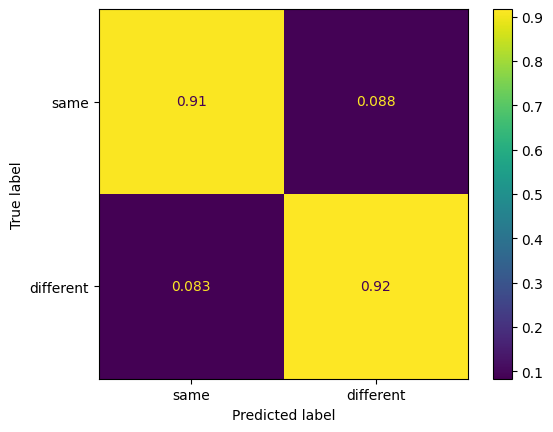

In [17]:
# Step 8: AUC-PR (Area Under the Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("AUC-ROC: %.2f" % roc_auc)
print("AUC-PR: %.2f" % auc_pr)


ConfusionMatrixDisplay.from_predictions(
    y_true=y_test, y_pred=y_pred, normalize="true", display_labels=["same", "different"]
)
plt.show()

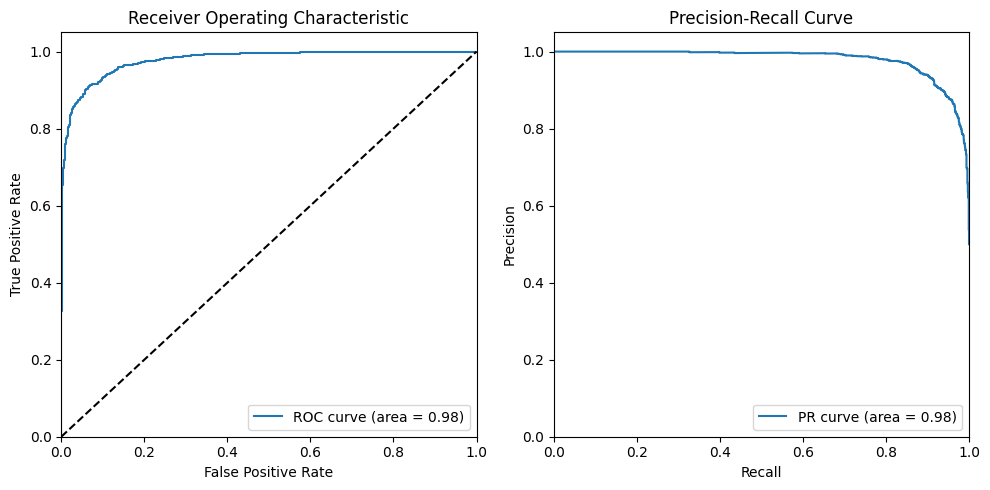

In [11]:
# Step 6: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Step 7: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()

In [18]:
joblib.dump(model, '/home/tarek/.keystrokes/data/artifacts/model.joblib')
joblib.dump(feature_pipeline, '/home/tarek/.keystrokes/data/artifacts/feature_pipeline.joblib')

['/home/tarek/.keystrokes/data/artifacts/feature_pipeline.joblib']

In [20]:
feature_pipeline.named_steps['transpose'].selected_columns_

['KEYCODES_190_16_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_87_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_16_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_190_16_ABS_DIFF_HOLD_TIME',
 'KEYCODES_32_84_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_83_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_65_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_73_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_72_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_79_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_66_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_67_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_70_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_80_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_77_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_68_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_89_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_8_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_71_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_32_82_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_65_78_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_65_84_ABS_DIFF_PRESS_PRESS_TIME',
 'KEYCODES_16_73